In [15]:
# Inference by give an image and get text

In [16]:
import torch

from inference.pipeline import Pipe, Task, Model

In [17]:
# for test in database
import ujson
with open("./datasets/MSRA-TD500/annotations.json", "r") as f:
    annotations = ujson.load(f)
    
def get_path(index, dset='test'):
    index = 10
    path = f"./datasets/MSRA-TD500/{dset}/{annotations[dset][index]['img_name']}"
    return path

In [18]:
source_image_path = 'test.png'

# Detection

In [19]:
from doctr.models import db_mobilenet_v3_large, db_resnet50
from modules.detection.model import TextDetector
from configs.detection_config import feature_size,pretrained

In [20]:
detection = Pipe(Task.detection)

/Users/hung/Desktop/OCR/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hung/Desktop/OCR/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


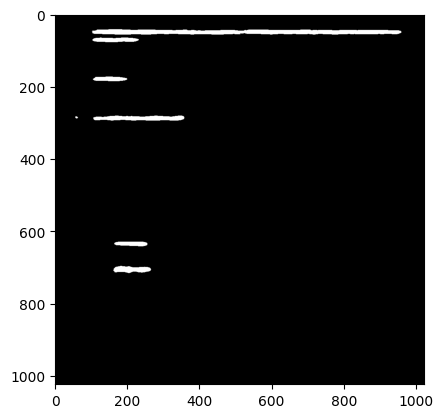

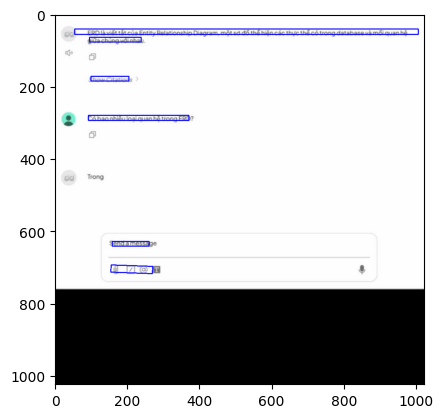

In [22]:
# model = db_mobilenet_v3_large(pretrained=True)
# model = db_resnet50(pretrained=True)

model = TextDetector(
    pretrained = pretrained,
    feature_size=feature_size
)
state_dict = torch.load(f'./checkpoints/detection/model-self.pth')
model.load_state_dict(state_dict)

results = detection.pipeline(model=model, image_path=source_image_path, polyon=True, show=True, expand_ratio=0.1)

# Recognition

In [23]:
from PIL import Image
from modules.recognition.model import OCRModel
from modules.recognition.vocab import Vocabulary
from configs.recognition_config import d_model, d_ff, num_heads, num_decoder_layers, dropout
vocab = Vocabulary()

In [24]:
recognition = Pipe(Task.recognition)

reg_model = OCRModel(
    vocab_size=len(vocab),
    d_model = d_model,
    num_heads = num_heads,
    d_ff = d_ff,
    num_decoder_layers = num_decoder_layers,
    dropout = dropout
)

model_name = 'model_weights-200'
state_dict = torch.load(f'./checkpoints/recognition/{model_name}.pth')
reg_model.load_state_dict(state_dict)

<All keys matched successfully>

In [25]:
for r in results:
    sub_image = Image.fromarray(r)
    text, _, _ = recognition.pipeline(model=reg_model, image=sub_image, vocab=vocab)
    print(text)
    display(sub_image)

từ đi. Ngồi 22 tại đã nội. Hà cho tôi được - trất thuộc.


trên đất Hà thực. Hồ đuổi trưa - đầu tư. Mặc diện 2 đất nào.


trận đất, thờ điện tôi kỹ thuật). Hà đường ti hồ tại đấu, thôi tinhật đấu :


điều tôi đã - hội trước đô tiền - được thôi. Hà Nội đuổi ược thôi - đồng tại này đã tược.


từ điều thôi. Hồ 200 tôi được - hai trận đất. Hà chưa tiếu đồng tại - đầu tư.


HĐND thức kiếp thịch đi bàn tư chờng tại khu dân từ chiện tôi khoát dài thu sức điền thước kinh


# Visualization

In [26]:
visualize = Pipe(Task.visualize)

In [27]:
image = sub_image

generated:  HĐND thức kiếp thịch đi bàn tư chờng tại khu dân từ chiện tôi khoát dài thu sức điền thước kinh


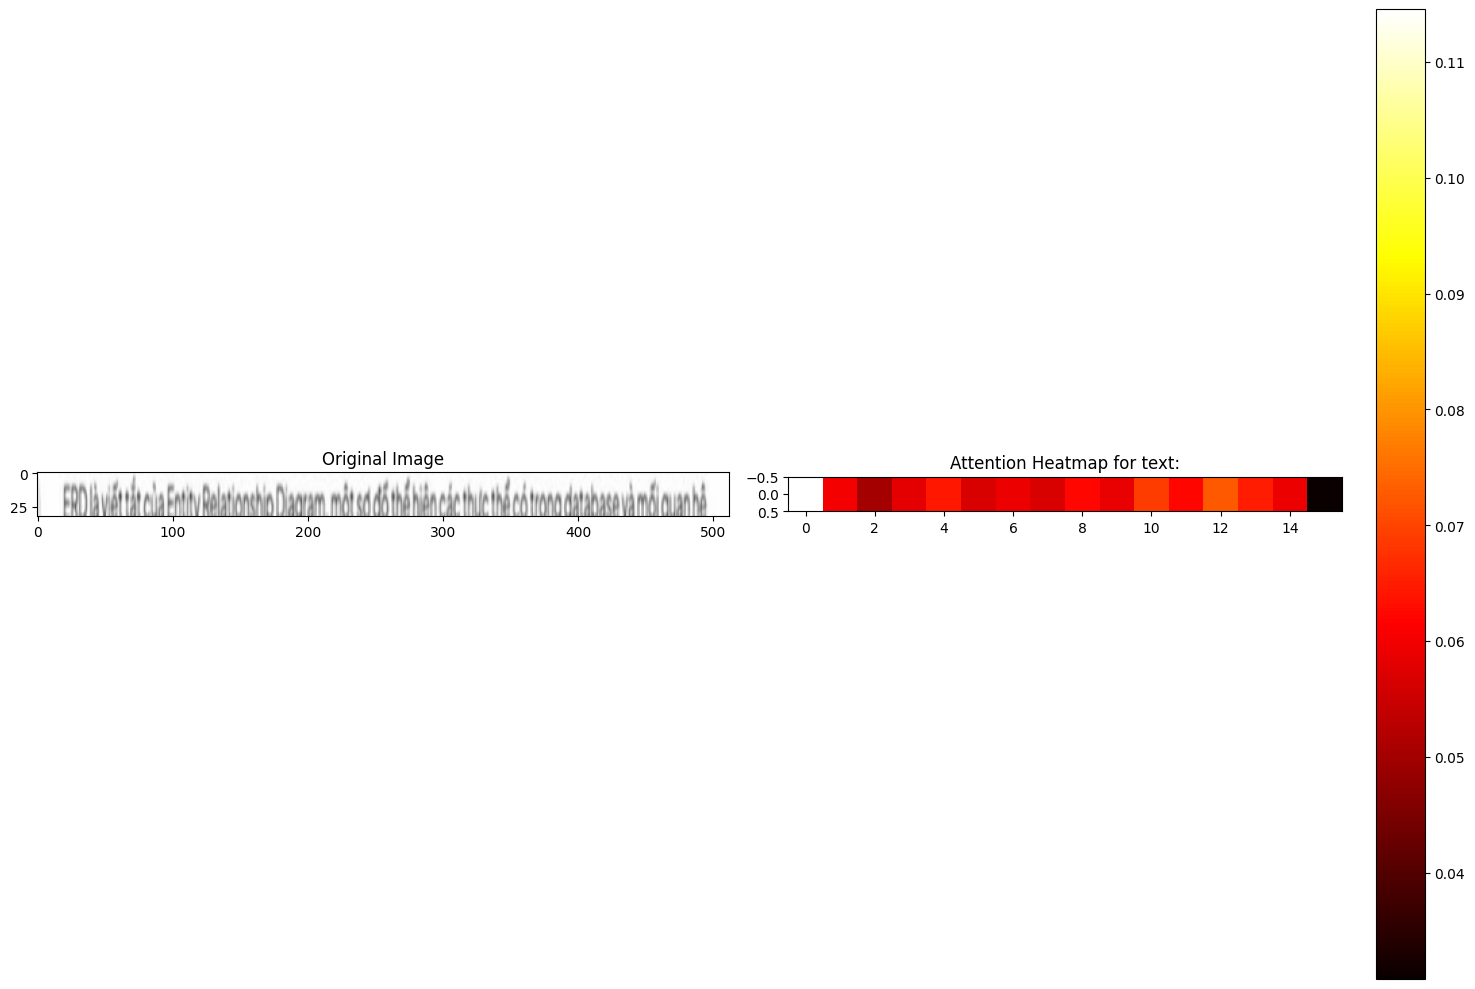

In [28]:
display(image)
_ = visualize.pipeline(model=reg_model, image=image, vocab=vocab)